# Tutorial 5: Transmission loss with isovelocity
This tutorial shows how to compute transmission loss for a realistic topography assuming a uniform sound speed.

We begin by loading and interpolating the bathymetry data.

In [1]:
from kadlu.bathy_reader import BathyReader, LatLon
from kadlu.bathy_interpolator import BathyInterpolator
import matplotlib.pyplot as plt

# folder where the GeoTIFF files are stored
folder = 'assets/tif/'

# reader
reader = BathyReader(folder) 

# interpolator (select between 'linear', 'nearest', 'cubic')
bathy = BathyInterpolator(reader, latlon_SW=LatLon(43.2,-60.5), latlon_NE=LatLon(44.0,-59.5), method='cubic') 

# plot the bathymetry in planar geometry on a 200 x 200 grid
bathy.plot_xy(x_bins=200, y_bins=200)
plt.show()

<Figure size 800x600 with 2 Axes>

Next, we configure our transmission loss calculator. We set the calculation range to 15 km, the step size to 100 m, the angular bin size to 10 degrees, the vertical bin size to 10 m, and the maximum depth to 2 km. We use default values for all other input arguments; see the [Documentation Page](https://docs.meridian.cs.dal.ca/kadlu/modules/transmission_loss/transmission_loss_calculator.html#kadlu.transmission_loss.transmission_loss_calculator.TransmissionLossCalculator) for a complete list.

In [2]:
from kadlu.transmission_loss.transmission_loss_calculator import TransmissionLossCalculator

calc = TransmissionLossCalculator(bathymetry=bathy, step_size=100, range=15e3, angular_bin_size=10, vertical_bin_size=10, max_depth=2e3, verbose=False, progress_bar=True)

Let us now compute the transmission loss for a point source located at 12 meters depth at the origin of our x,y coordinate system, which is radiating at a frequency of 20 Hz. We request the transmission loss to be computed 1 m  below the sea surface. We also request the transmission loss to be computed along vertical transects, which makes the computation somewhat slower, but gives a richer output. 

In [3]:
calc.run(frequency=20, source_depth=12, receiver_depths=[1], vertical_slice=True)

100%|██████████| 150/150 [03:52<00:00,  1.55s/it]


Our final exercise will be to inspect the results of our calculation. First we plot the transmission loss at 0.1 m and 1 km depth:

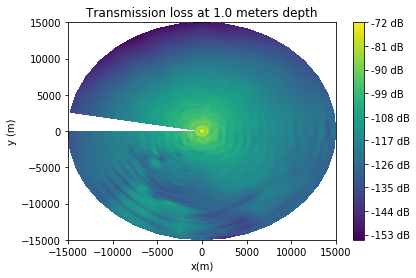

In [4]:
# matplotlib.use("TkAgg") # uncomment this lines for Mac OS
from matplotlib import pyplot as plt

calc.plot(0)
plt.show()

We may also view the transmission loss along vertical transects at selected angles, like this

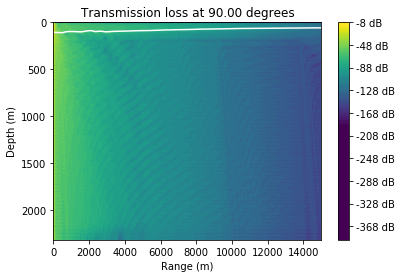

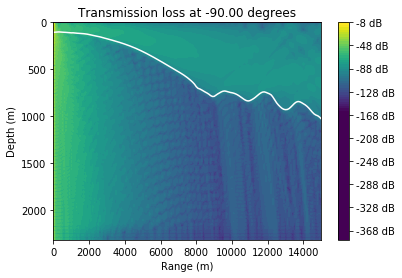

In [5]:
calc.plot_vertical(angle=90, show_bathy=True) # 90 degrees (north)
plt.show()

calc.plot_vertical(angle=-90, show_bathy=True) # -90 degrees (south)
plt.show()

The underlying data used to generate the above figures can be accessed via the attributes `TL` and `TL_vertical`, as follows,

In [6]:
tl_h = calc.TL           # horizontal plane(s)
tl_v = calc.TL_vertical  # vertical planes

The variable `tl_h` now contains the transmission loss on a horizontal plane at the requested depth of 1 m, while `tl_v` contains the transmission loss on a vertical plane in each angular bin. `tl_h` has dimensions `(Nq, Nr)`  where `Nq` is number of angular bins and `Nr` is the number of radial steps, whereas `tl_v` has dimensions `(Nz/2, Nr+1, Nq)` where `Nz` is the number of vertical grid points.

In [7]:
print(tl_h.shape)
print(tl_v.shape)

(36, 150)
(233, 151, 36)


Lastly, let us export the data to some formats that are easy to work with:

In [9]:
# save as tl_h *.csv
import numpy as np
np.savetxt("tl_h.csv", np.asarray(tl_h), delimiter=",")

# save as tl_h *.mat
from scipy.io import savemat
savemat("tl_h.mat", {"X": tl_h})